# PDF analysis and mode computation by the **binning method**
This notebook analyses the distribution of monthly distances performed by the S&P500 index during the last 30 years. Distances are provided as percentages, computing the difference between value index observed at the end of each month and at the beginning.

## Method description
The distribution is obtained by the **binning method**. An interval of interest of possible distances, namely 30, is observed. 30 means distances from -15% up to +15%, which contains all available data.

A number of bins according to the setting of ```bin_width``` parameter is computed, and data are then grouped according to the bin they belong to. The number of occurrences of data points in each bin determines the **frequency** of the bin, represented as the bin height in the monthly plot, where all bins are plotted, showing an approximation of the underlying __probability density function (pdf)__ for the corresponding month.

Given the __pdf__, **statistical mode** is computed as the bin central value with the maximum frequency (number of occurrences). <span style="color:red">When more than one bins have the same frequency, the left-most bin is returned, highlighting the lowest/ most negative distance value</span>

## Output data
Both the plots and the results are saved on disk in the the specified __output_folder__, where both **png images** and **tsv files** are provided. Each file contains data for all months, according to the specified ```bin_width`` parameter setup.

The **tsv file** contains data about the observed values for both the **mode** and the original **average** coming from the input seasonality data. These files can be openend as plain text files or with **Excel/ Numbers/ Google Sheets*.

Change the ```bin_width``` parameter to inspect how the pdf evolves, along with the mode value.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

N_MONTHS = 12

ANALYSIS_INTERVAL = 30

input_dir = os.path.abspath("./data")
input_file_path = os.path.join(input_dir, "seasonality_S&P500.tsv")
output_dir = os.path.abspath("./output")

months=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dtypes= {"Year": np.int32, "Year": np.float64, "Jan": np.float64, "Feb": np.float64, "Mar": np.float64, "Apr": np.float64, "May": np.float64, "Jun": np.float64, "Jul": np.float64, "Aug": np.float64, "Sep": np.float64, "Oct": np.float64, "Nov": np.float64, "Dec": np.float64}

seasonality = pd.read_csv(input_file_path, sep="\t", header=None, names=months, index_col=0)

display(seasonality)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2023,6.18,-2.61,3.51,1.46,0.25,6.47,3.11,-1.77,-4.87,-2.20,8.92,4.42
2022,-5.26,-3.14,3.58,-8.80,0.01,-8.39,9.11,-4.24,-9.34,7.99,5.38,-5.90
2021,-1.11,3.01,4.24,5.24,0.55,2.22,2.43,3.31,-5.13,7.39,-1.09,4.36
2020,-0.16,-8.41,-12.51,13.08,4.53,2.24,5.51,7.01,-4.32,-3.17,11.15,3.71
2019,8.27,3.37,2.19,4.33,-6.58,7.29,1.31,-2.21,2.12,2.04,3.40,2.86
2018,6.02,-4.29,-3.09,0.27,2.16,0.48,4.00,3.03,0.43,-7.34,2.19,-9.18
2017,2.19,4.12,-0.40,1.31,1.16,0.48,2.33,0.05,2.33,2.22,3.21,0.98
2016,-5.07,-0.41,7.00,0.27,1.53,0.09,3.56,-0.12,-0.12,-2.34,3.42,1.82
2015,-3.10,5.49,-2.14,1.25,1.05,-2.10,2.37,-6.26,-3.04,8.30,0.05,-1.75
2014,-3.56,4.31,1.09,1.02,2.10,2.31,-1.51,4.17,-1.55,2.32,2.45,-0.42


In [5]:
try:
    os.makedirs(output_dir)
except FileExistsError:
    print("Warning: directory already exists")


def pdf_binning(monthly_data, bin_width=1):
    n_bins = round(ANALYSIS_INTERVAL/bin_width) # 30 is the total distance span of interest (i.e. -15% : +15%)

    max_negative_dist = -bin_width*n_bins/2
    max_positive_dist = max_negative_dist+bin_width*(n_bins+1)
    bin_edges = np.arange(max_negative_dist, max_positive_dist, bin_width)  
    hist, bins = np.histogram(monthly_data, bins=bin_edges, density=False)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    mode = bin_centers[np.argmax(hist)]
    avg = np.round(np.average(monthly_data), 2)

    return hist, bin_centers, mode, avg


def month_subplot(month, ax, hist, bin_width, bin_centers, mode, avg):
    ax.bar(bin_centers, hist, width=bin_width*0.95, alpha=0.7, color='blue')
    ax.set_title(f'{month}, distance per bin = {bin_width}%, mode = {mode}, average = {avg}')


def execute_analysis(seasonality, bin_width):
    fig, axes = plt.subplots(N_MONTHS, 1, figsize=(10, 40))
    modes = []

    for i in range(N_MONTHS):
        month = months[i]
        monthly_data = seasonality[month]
        hist, bin_centers, mode, avg = pdf_binning(monthly_data, bin_width)
        ax = axes[i]
        modes.append({"month": months[i], "mode":mode, "avg": avg})
        month_subplot(month, ax, hist, bin_width, bin_centers, mode, avg)

    # Set common Y-axis label
    fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize=14)

    plt.subplots_adjust(hspace=0.5) 

    output_fig_path = os.path.join(output_dir, f"figure_pdf_bin_width_{bin_width}.png")

    # Producing png file
    plt.savefig(output_fig_path)

    plt.show()
    plt.close(fig)

    # Producing tsv file
    output_tsv_path = os.path.join(output_dir, f"seasonality_metrics_distance_{bin_width}.tsv")

    df = pd.DataFrame(modes)
    display(df)
    df.to_csv(output_tsv_path, index=False, sep="\t", encoding='utf-8')



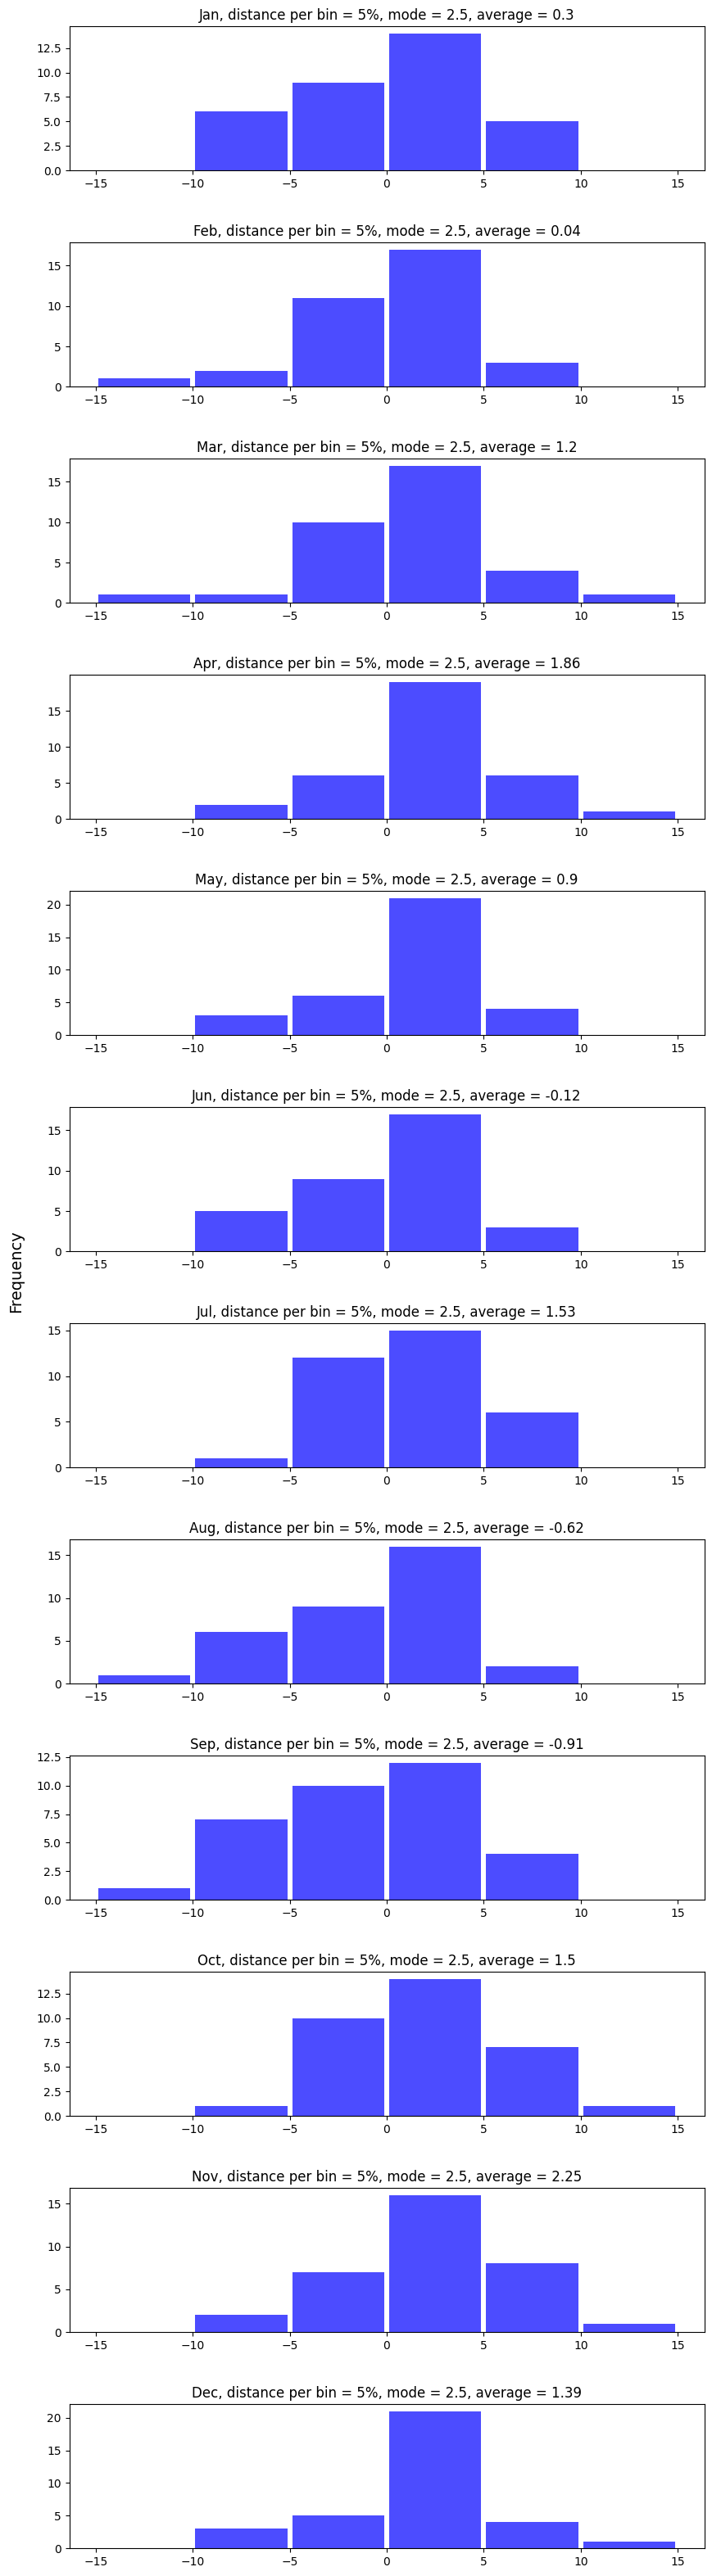

,month,mode,avg
0,Jan,2.5,0.30
1,Feb,2.5,0.04
2,Mar,2.5,1.20
3,Apr,2.5,1.86
4,May,2.5,0.90
5,Jun,2.5,-0.12
6,Jul,2.5,1.53
7,Aug,2.5,-0.62
8,Sep,2.5,-0.91
9,Oct,2.5,1.50


In [6]:
bin_width = 5

execute_analysis(seasonality, bin_width)